## CMIP6 model data using Pangeo catalog

In [65]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

In [8]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [20]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Omon','SImon'], 
                 #grid_label=['gr1'],
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [47]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [48]:
list(dset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn',
 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [49]:
si = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn']

In [ ]:
si

In [50]:
no3 = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [59]:
no3.time.values

array([cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2014, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)

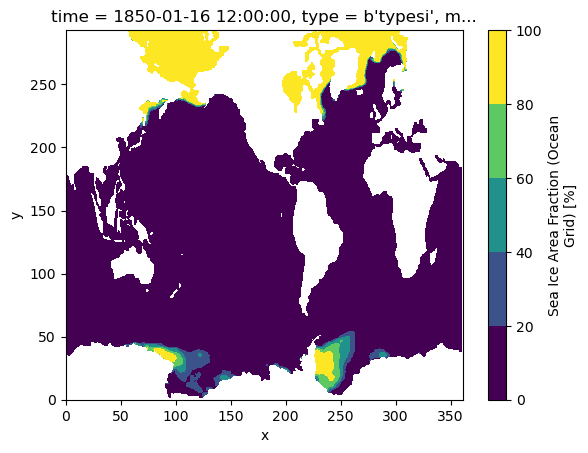

In [64]:
# select a specific time
si.siconc.isel(member_id=0).sel(time = cftime.DatetimeGregorian(1850, 1, 16), method = 'nearest').squeeze().plot.contourf()
#si['siconc'].sel(time=cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0)).plot(cmap = 'coolwarm')'

In [ ]:
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
si.siconc.isel(member_id=0).sel(
    time = cftime.DatetimeGregorian(1850, 1, 16), method = 'nearest'
).squeeze().plot.pcolormesh(
    ax=ax, 
    cmap='coolwarm',
    transform = ccrs.PlateCarree()
)


In [39]:
for m in dset_dict:
    _ds = dset_dict[m]
    _ds = _ds.sel(time= slice('1850-01-01','2014-12-01'))
   # _ds = _ds.where(_ds.lat>= 70, drop = True)
    dset_dict[m] = _ds

In [42]:
dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn'].lat.values

array([[62.01823807, 62.31846619, 62.61601257, ..., 62.61601257,
        62.31846619, 62.01823807],
       [62.39691162, 62.70273972, 63.00589752, ..., 63.00589752,
        62.70273972, 62.39691162],
       [62.77043915, 63.0818367 , 63.39058685, ..., 63.39058685,
        63.0818367 , 62.77043915],
       ...,
       [70.43422699, 70.88079071, 71.32794952, ..., 71.32794952,
        70.88079071, 70.43422699],
       [70.44381714, 70.89059448, 71.33796692, ..., 71.33796692,
        70.89059448, 70.44381714],
       [70.44381714, 70.89059448, 71.33796692, ..., 71.33796692,
        70.89059448, 70.44381714]])

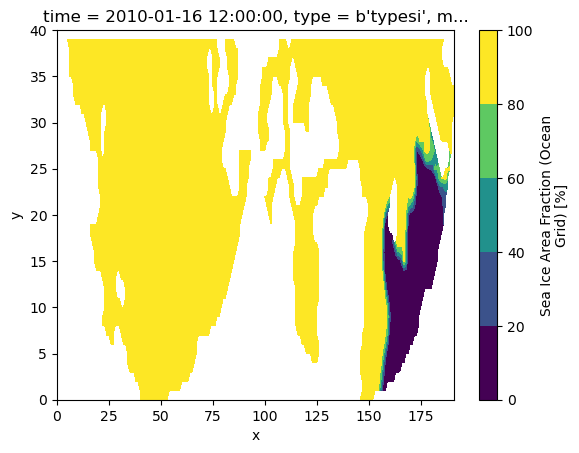

In [46]:
dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn'].siconc.isel(member_id=0).sel(time='2010-01-16').squeeze().plot.contourf()
